In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/cleaned_supply_chain_logistics_dataset.csv')

## **🛢️ Fuel & Efficiency Analysis**

#### **Q1: What is the average fuel consumption?**

In [3]:
avg_fuel = df['fuel_consumption_rate'].mean()
print('Q1: Average fuel consumption rate:', round(avg_fuel, 2))

Q1: Average fuel consumption rate: 7.87


#### **Q2: What is the average delivery efficiency by delay category?**

Q2: Average delivery efficiency by delay category:
  delay_category  delivery_efficiency
0          Early                69.21
1           Late                71.10
2        On Time                81.19
3      Very Late                 9.28


C:\Users\ziadz\AppData\Local\Temp\ipykernel_26764\471950601.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_efficiency_by_delay, x='delay_category', y='delivery_efficiency', palette='viridis')


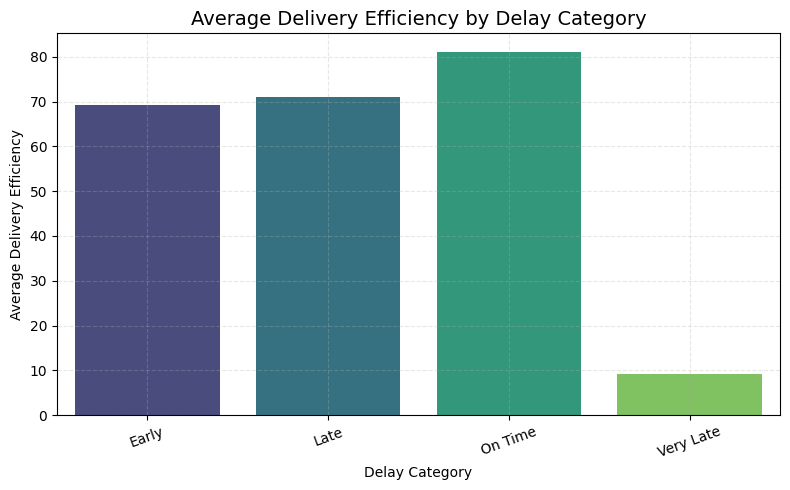

In [4]:
# Calculate average delivery efficiency by delay category
avg_efficiency_by_delay = df.groupby('delay_category')['delivery_efficiency'].mean().round(2).reset_index()

# Print summary
print('Q2: Average delivery efficiency by delay category:')
print(avg_efficiency_by_delay)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_efficiency_by_delay, x='delay_category', y='delivery_efficiency', palette='viridis')
plt.title('Average Delivery Efficiency by Delay Category', fontsize=14)
plt.ylabel('Average Delivery Efficiency')
plt.xlabel('Delay Category')
plt.xticks(rotation=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### **Q3: Which hour of the day has the highest average fuel consumption?**

Q3: Hour with highest average fuel consumption: 11
Fuel consumption at that hour: 8.09


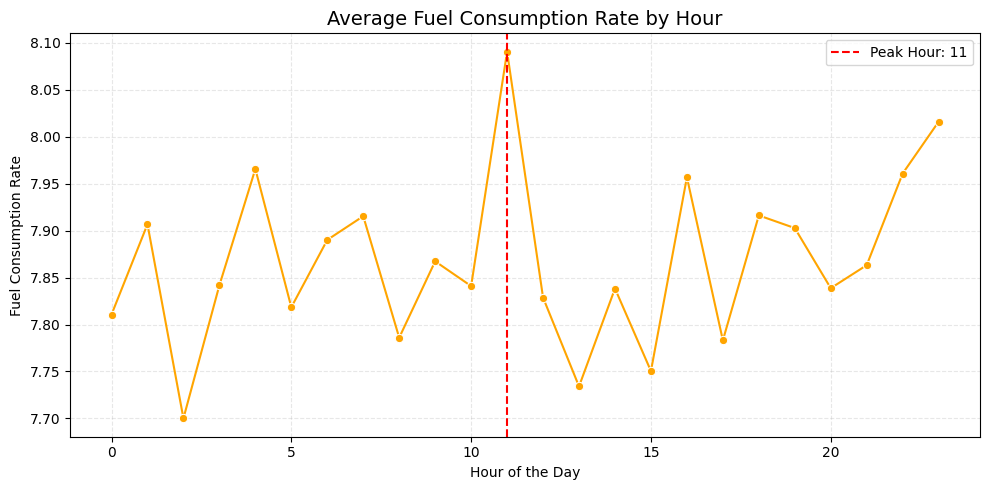

In [5]:
# Calculate the average fuel consumption for each hour
hour_fuel = df.groupby('hour')['fuel_consumption_rate'].mean()

# Identify the hour with the highest average fuel consumption
max_hour = hour_fuel.idxmax()

# Print the hour with the highest fuel consumption
print('Q3: Hour with highest average fuel consumption:', max_hour)
print('Fuel consumption at that hour:', round(hour_fuel[max_hour], 2))

# Plot the graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_fuel.reset_index(), x='hour', y='fuel_consumption_rate', marker='o', color='orange')
plt.title('Average Fuel Consumption Rate by Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Fuel Consumption Rate')
plt.grid(True, linestyle='--', alpha=0.3)

# Add a vertical line to represent the hour with the highest consumption
plt.axvline(x=max_hour, color='red', linestyle='--', label=f"Peak Hour: {int(max_hour)}")
plt.legend()
plt.tight_layout()
plt.show()

#### **Q4: How does cost efficiency vary across different delay categories?**

C:\Users\ziadz\AppData\Local\Temp\ipykernel_26764\353598482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cost_eff_by_delay, x='delay_category', y='cost_efficiency', palette='coolwarm')


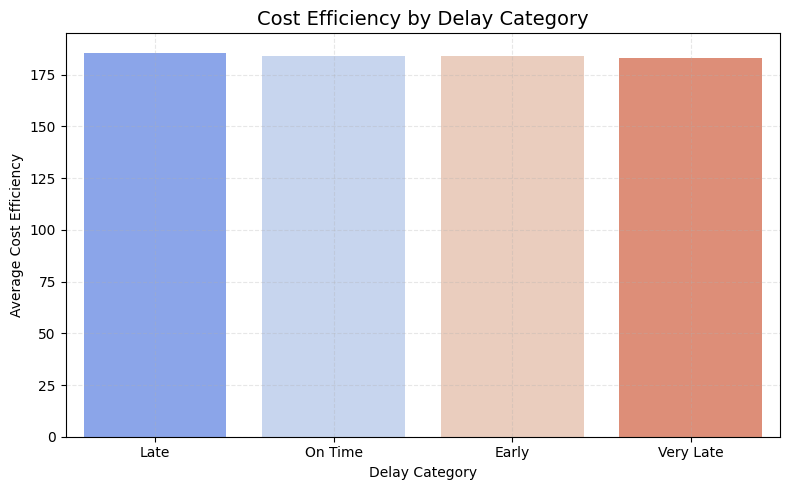

In [6]:
# Calculate the average cost efficiency for each delay category
cost_eff_by_delay = df.groupby('delay_category')['cost_efficiency'].mean().reset_index()

# Sort the categories by cost efficiency in descending order
cost_eff_by_delay = cost_eff_by_delay.sort_values(by='cost_efficiency', ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=cost_eff_by_delay, x='delay_category', y='cost_efficiency', palette='coolwarm')
plt.title('Cost Efficiency by Delay Category', fontsize=14)
plt.xlabel('Delay Category')
plt.ylabel('Average Cost Efficiency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### **Q5: What are the distributions of fuel consumption, shipping costs, and total risk score across all records?**

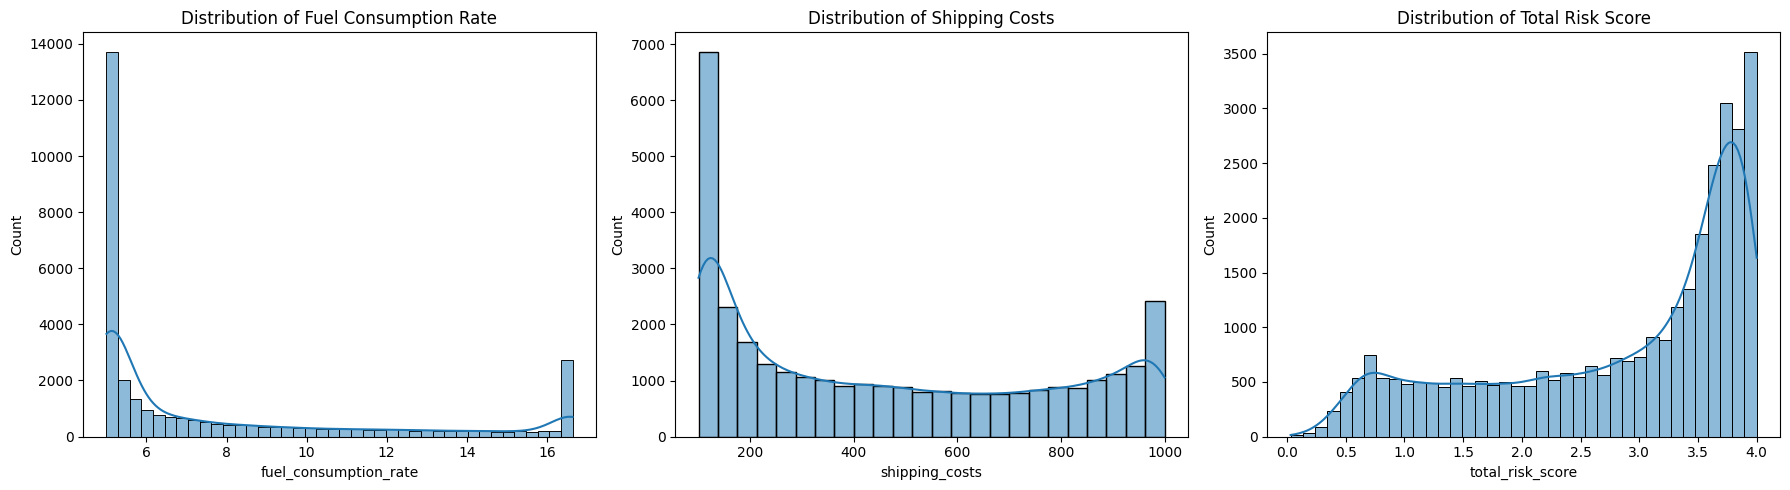

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

if 'fuel_consumption_rate' in df.columns:
    sns.histplot(df['fuel_consumption_rate'].dropna(), kde=True, ax=axes[0])
    axes[0].set_title('Distribution of Fuel Consumption Rate')

if 'shipping_costs' in df.columns:
    sns.histplot(df['shipping_costs'].dropna(), kde=True, ax=axes[1])
    axes[1].set_title('Distribution of Shipping Costs')

if 'total_risk_score' in df.columns:
    sns.histplot(df['total_risk_score'].dropna(), kde=True, ax=axes[2])
    axes[2].set_title('Distribution of Total Risk Score')

plt.tight_layout()
plt.show()

## **⏰ Delays & Time Analysis**

#### **Q6: How many times has "Very Late" happened?**

In [8]:
very_late_count = df[df['delay_category'] == 'Very Late'].shape[0]
print('\
Q6: Number of "Very Late" deliveries:', very_late_count)

Q6: Number of "Very Late" deliveries: 22841


#### **Delay Category Distribution**

In [9]:
print('\
Delay Category Distribution:')
print(df['delay_category'].value_counts())

Delay Category Distribution:
delay_category
Very Late    22841
Early         4786
Late          2548
On Time       1890
Name: count, dtype: int64


#### **Q7: During which hour of the day do deliveries experience the highest average delay?**

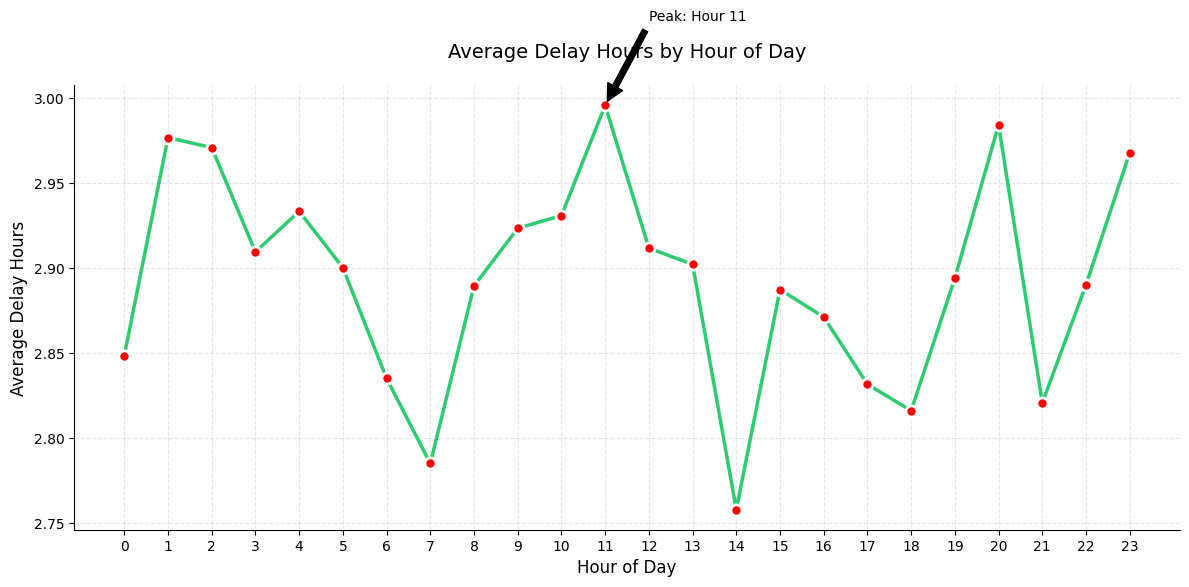

In [10]:
# Calculate average delay hours per hour of the day
df['delay_hours'] = df['eta_variation_hours']
hourly_delay = df.groupby('hour')['delay_hours'].mean().reset_index()

# Identify the hour with the highest average delay
peak_hour = hourly_delay.loc[hourly_delay['delay_hours'].idxmax(), 'hour']
peak_value = hourly_delay['delay_hours'].max()

# Plot
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(
    x='hour',
    y='delay_hours',
    data=hourly_delay,
    marker='o',
    color='#2ecc71',
    linewidth=2.5,
    markersize=8,
    markerfacecolor='red',
    markeredgewidth=2
)

# Customize plot
plt.title('Average Delay Hours by Hour of Day', fontsize=14, pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Delay Hours', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3, linestyle='--')

# Annotate peak hour
plt.annotate(
    f'Peak: Hour {peak_hour}',
    xy=(peak_hour, peak_value),
    xytext=(peak_hour + 1, peak_value + 0.05),
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Clean up visual
sns.despine()
plt.tight_layout()
plt.show()

#### **Q8: What is the average delivery delay (in minutes) for each hour of the day, and during which hour does the peak delay occur?**

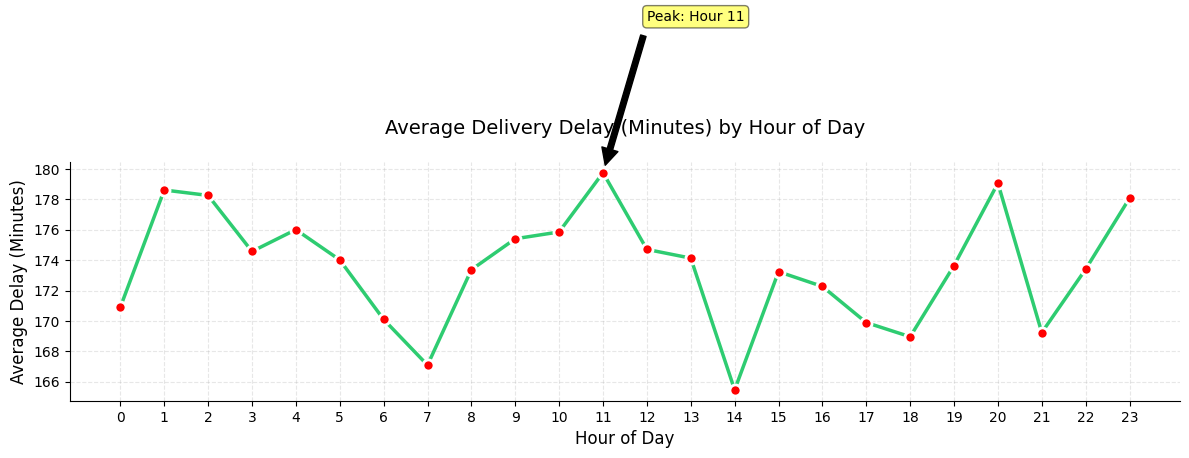

In [11]:
# Calculate average delay in minutes per hour of the day
df['delay_hours'] = df['eta_variation_hours']
hourly_delay = df.groupby('hour')['delay_hours'].mean().mul(60).reset_index()  # Convert hours to minutes

# Identify the hour with the highest average delay
peak_hour = hourly_delay.loc[hourly_delay['delay_hours'].idxmax(), 'hour']
peak_value = hourly_delay['delay_hours'].max()

# Plot the delay trend
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(
    x='hour',
    y='delay_hours',
    data=hourly_delay,
    marker='o',
    color='#2ecc71',
    linewidth=2.5,
    markersize=8,
    markerfacecolor='red',
    markeredgewidth=2
)

# Customize plot appearance
plt.title('Average Delivery Delay (Minutes) by Hour of Day', fontsize=14, pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3, linestyle='--')

# Annotate the peak delay hour with better label placement
plt.annotate(
    f'Peak: Hour {peak_hour}',
    xy=(peak_hour, peak_value),
    xytext=(peak_hour + 1, peak_value + 10),  # Adjust label position upward and right
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5)  # Optional: background for better visibility
)

# Final layout adjustments
sns.despine()
plt.tight_layout()
plt.show()


#### **Q9: What is the average ETA variation for each day of the week?**

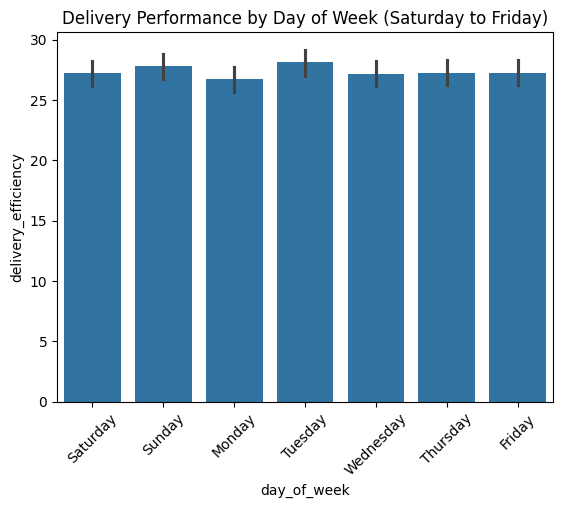

In [12]:
# Define the desired day order (Saturday to Friday)
days_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Convert the 'day_of_week' column to a categorical type with the specified order
df['day_of_week'] = pd.Categorical(
    df['day_of_week'], 
    categories=days_order, 
    ordered=True
)

# Plot the data with the new order
sns.barplot(
    x='day_of_week', 
    y='delivery_efficiency', 
    data=df.sort_values('day_of_week'),  # Sorting ensures proper order
    order=days_order  # Explicitly enforce the order in the plot
)
plt.title("Delivery Performance by Day of Week (Saturday to Friday)")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

#### **Q10: Which delay category has the longest average loading/unloading time?**

**🚛 Delay category with the longest loading/unloading time:** `Early` **(2.31 hours)**

,delay_category,loading_unloading_time
0,Early,2.314235
1,Very Late,2.295353
2,On Time,2.249132
3,Late,2.247582


C:\Users\ziadz\AppData\Local\Temp\ipykernel_26764\4141544457.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


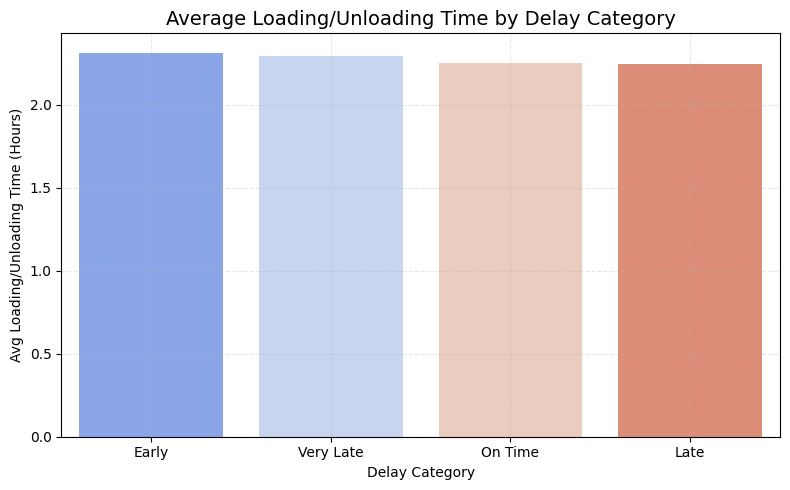

In [13]:
# Group by delay category and calculate average loading/unloading time
loading_by_delay = df.groupby('delay_category')['loading_unloading_time'].mean().reset_index()

# Find the category with the maximum average
max_loading = loading_by_delay.loc[loading_by_delay['loading_unloading_time'].idxmax()]

# Display header as Markdown
from IPython.display import display, Markdown
display(Markdown(f"**🚛 Delay category with the longest loading/unloading time:** `{max_loading['delay_category']}` **({max_loading['loading_unloading_time']:.2f} hours)**"))

# Show the full table sorted by time descending
loading_sorted = loading_by_delay.sort_values('loading_unloading_time', ascending=False).reset_index(drop=True)
display(loading_sorted)

# Plotting the graph
plt.figure(figsize=(8, 5))
sns.barplot(
    data=loading_sorted,
    x='delay_category',
    y='loading_unloading_time',
    palette='coolwarm'
)
plt.title('Average Loading/Unloading Time by Delay Category', fontsize=14)
plt.xlabel('Delay Category')
plt.ylabel('Avg Loading/Unloading Time (Hours)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## **⚠️ Risk & Performance**

#### **Q11: How many cases are classified as "High Risk"?**

In [14]:
df[df['risk_classification'] == 'High Risk'].shape[0]

23944

#### **Q12:What is the distribution of cargo condition statuses across risk levels (Low, Moderate, High)?**

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(
    x='risk_classification',
    hue='cargo_condition_status',
    data=df,
    palette='Set2',
    order=["Low Risk", "Moderate Risk", "High Risk"]  # Force order if needed
)
plt.title("Cargo Condition vs. Risk Classification")
plt.xlabel("Risk Classification")
plt.ylabel("Count")
plt.legend(title="Cargo Condition", bbox_to_anchor=(1.05, 1))  # Move legend outside
plt.tight_layout()  # Prevent overlapping elements
plt.show()

#### **Q13: What is the relationship between delivery performance and cost efficiency**

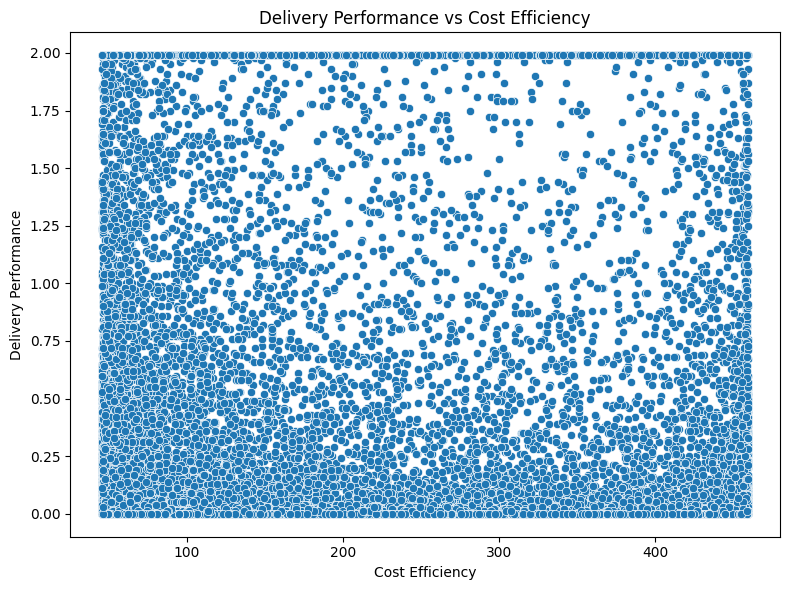

In [ ]:
# Extra Analysis: Delivery performance, cost_efficiency etc.
if 'delivery_performance' in df.columns and 'cost_efficiency' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='cost_efficiency', y='delivery_performance', data=df)
    plt.title('Delivery Performance vs Cost Efficiency')
    plt.xlabel('Cost Efficiency')
    plt.ylabel('Delivery Performance')
    plt.tight_layout()
    plt.show()

## **📦 Inventory & Warehouse Metrics**

#### **Q14: What is the average delivery performance per risk level (Low, Medium, High)?**

Average Delivery Performance per Risk Level:
  risk_classification  delivery_performance
1            Low Risk              1.185939
2       Moderate Risk              1.073377
0           High Risk              0.309149


C:\Users\abdul\AppData\Local\Temp\ipykernel_18124\4091597476.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_by_risk, x='risk_classification', y='delivery_performance', palette='Set2')


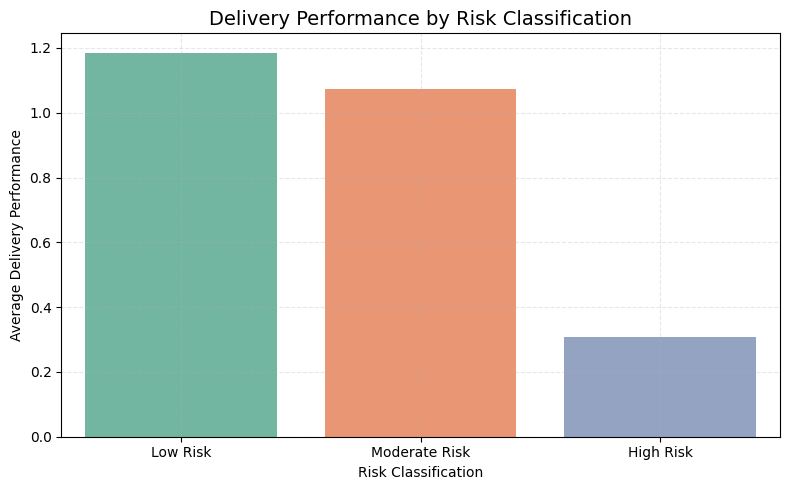

In [ ]:
# Group by risk classification and calculate average delivery performance
performance_by_risk = df.groupby('risk_classification')['delivery_performance'].mean().reset_index()

# Sort results by risk level (optional)
risk_order = ['Low Risk', 'Moderate Risk', 'High Risk']
performance_by_risk['risk_classification'] = pd.Categorical(performance_by_risk['risk_classification'], categories=risk_order, ordered=True)
performance_by_risk = performance_by_risk.sort_values('risk_classification')

# Display the result
print("Average Delivery Performance per Risk Level:")
print(performance_by_risk)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=performance_by_risk, x='risk_classification', y='delivery_performance', palette='Set2')
plt.title('Delivery Performance by Risk Classification', fontsize=14)
plt.xlabel('Risk Classification')
plt.ylabel('Average Delivery Performance')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### **Q15: How does traffic congestion correlate with total risk score?**

In [ ]:
# Q15: Correlation between traffic congestion and total risk
corr = df['traffic_congestion_level'].corr(df['total_risk_score'])
print('\
Q15: Correlation between traffic congestion and total risk score:', round(corr, 3))

Q15: Correlation between traffic congestion and total risk score: 0.006


Correlation between traffic congestion and total risk score: 0.01


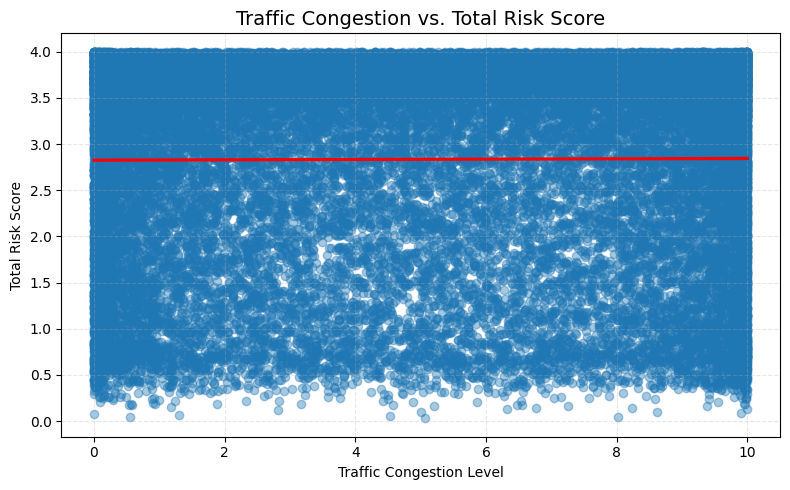

In [ ]:
# Calculate correlation between traffic congestion and total risk score
correlation = df['traffic_congestion_level'].corr(df['total_risk_score'])

print(f"Correlation between traffic congestion and total risk score: {correlation:.2f}")

# Optional: create a scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='traffic_congestion_level',
    y='total_risk_score',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Traffic Congestion vs. Total Risk Score', fontsize=14)
plt.xlabel('Traffic Congestion Level')
plt.ylabel('Total Risk Score')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## **🗺️ Geospatial/Distance Metrics**

#### **Q16: What is the average warehouse inventory level per day of the week?**

In [ ]:
inv_by_day = df.groupby('day_of_week')['warehouse_inventory_level'].mean().round(2)
print('\
Q16: Average warehouse inventory level by day of week:')
print(inv_by_day)

Q16: Average warehouse inventory level by day of week:
day_of_week
Saturday     295.99
Sunday       299.70
Monday       301.56
Tuesday      297.91
Wednesday    304.52
Thursday     298.52
Friday       296.58
Name: warehouse_inventory_level, dtype: float64


C:\Users\abdul\AppData\Local\Temp\ipykernel_18124\1096649797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_by_day = df.groupby('day_of_week')['warehouse_inventory_level'].mean().round(2)


#### **Q17: Does low equipment availability correlate with lower delivery performance?**

In [ ]:
# Q17: Correlation between equipment availability and delivery performance
equip_corr = df['handling_equipment_availability'].corr(df['delivery_performance'])
print('\
Q17: Correlation between equipment availability and delivery performance:', round(equip_corr, 3))

Q17: Correlation between equipment availability and delivery performance: 0.001


Correlation between equipment availability and delivery performance: 0.00


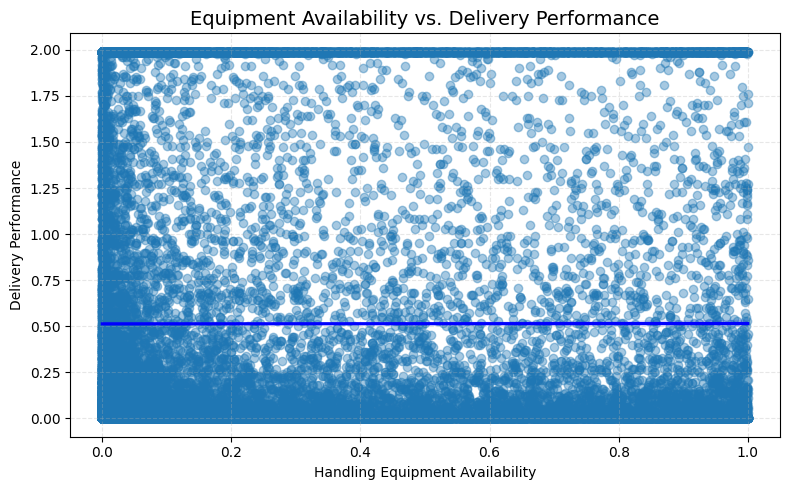

In [ ]:
# Calculate correlation between equipment availability and delivery performance
correlation = df['handling_equipment_availability'].corr(df['delivery_performance'])

print(f"Correlation between equipment availability and delivery performance: {correlation:.2f}")

# Optional: scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='handling_equipment_availability',
    y='delivery_performance',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'blue'}
)
plt.title('Equipment Availability vs. Delivery Performance', fontsize=14)
plt.xlabel('Handling Equipment Availability')
plt.ylabel('Delivery Performance')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### **Q18: What is the average delivery distance for each delay category?**

In [ ]:
dist_by_delay = df.groupby('delay_category')['distance'].mean().round(2)
print('\
Q18: Average distance by delay category:')
print(dist_by_delay)

Q18: Average distance by delay category:
delay_category
Early        22.61
Late         22.94
On Time      22.33
Very Late    22.85
Name: distance, dtype: float64


#### **Q19: What is the most frequent geographic location where late deliveries occur?**

In [ ]:
late_deliveries = df[df['delay_category'].isin(['Late', 'Very Late'])]
late_coords = late_deliveries.groupby(['vehicle_gps_latitude', 'vehicle_gps_longitude']).size().sort_values(ascending=False)
print('\
Q19: Most frequent location in late deliveries:')
if not late_coords.empty:
    top_location = late_coords.index[0]
    print(f'Latitude: {top_location[0]}, Longitude: {top_location[1]}')
    print(f'Frequency: {late_coords.iloc[0]} occurrences')

Q19: Most frequent location in late deliveries:
Latitude: 50.0, Longitude: -109.578466
Frequency: 1 occurrences
